<h1>Linear Regressioon</h1>
<p>this project uses linear regression to predict the FFMC of aa forest fire will burn</p> <p>linear regression is a form of supervised learning where correlations are represented between independant variables with a line using the formula <i>mx + b</i> so points without data on the line can be predicted </p>

In [97]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [98]:
#using pandas to find atriubutes
data = pd.read_csv("forestfires.csv")
print(data.head())

#keeps only the relevant data from the csv for training
data = data[["X","FFMC","DMC","DC","ISI", "RH", "temp", "wind", "rain","area"]]
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
   X  FFMC   DMC     DC  ISI  RH  temp  wind  rain  area
0  7  86.2  26.2   94.3  5.1  51   8.2   6.7   0.0   0.0
1  7  90.6  35.4  669.1  6.7  33  18.0   0.9   0.0   0.0
2  7  90.6  43.7  686.9  6.7  33  14.6   1.3   0.0   0.0
3  8  91.7  33.3   77.5  9.0  97   8.3   4.0   0.2   0.0
4  8  89.3  51.3  102.2  9.6  99  11.4   1.8   0.0   0.0


In [99]:
predict= "FFMC"
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

<p>this line seperates the training data into what will be used for training and what will be used to verify how accurate the training is by comparing the prediction and the actual data. the data is split randomly on every run so so</p>

In [100]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

<p>this block of code contains the actual training and creation of the model</p>

In [101]:
#creates a linear regression object
linear = linear_model.LinearRegression()

# # Define the line of best fit
linear.fit(x_train, y_train)

#prints the accuracy of the model as a percentage in decimal form
acc = linear.score(x_test, y_test)
print(acc)

0.2775312324537913


<p>this isnt necassary to the actual model but saves on processing by saving the final model to a .pickle file so it can be reused later without haveing to run it again. if the full code is run again it will update the file with the new model</p>

In [102]:
with open("firemodel.pickle", "wb") as f:
    pickle.dump(linear, f)

# Load the pickle file
pickle_in = open("firemodel.pickle", "rb")
linear = pickle.load(pickle_in)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) 

Coefficient: 
 [-7.27578736e-03  1.76104363e-02  1.28590772e-03  5.00413522e-01
 -6.73837213e-02 -2.62172552e-02 -2.47917664e-01  6.51437195e-01
  4.61845514e-04]
Intercept: 
 88.03608013018928
95.03498201885357 [3.000e+00 1.573e+02 6.667e+02 1.350e+01 4.000e+01 2.170e+01 4.000e-01
 0.000e+00 2.470e+00] 93.1
87.51445547031256 [ 6.  37.6 83.7  7.2 54.  12.4  3.6  0.  12.1] 90.1
91.5281245284813 [  3.  248.4 753.8   6.3  56.   16.8   3.1   0.    0. ] 91.6
92.08487561248192 [  8.   81.8 480.8  11.9  34.   20.1   4.5   0.   58.3] 92.2
95.67686231171429 [  8.    80.9  685.2   17.9   26.    23.2    4.9    0.    23.41] 93.7
89.63663107095462 [  4.  114.3 661.3   6.3  45.   17.6   3.6   0.    0. ] 91.7
90.37362182330952 [  1.    87.7  721.1    9.5   54.    18.1    3.1    0.     2.13] 92.1
95.01187820006453 [  4.  152.  624.1  13.8  21.   32.4   4.5   0.    0. ] 95.8
93.34528561115752 [  2.   231.1  715.1    8.4   42.    21.9    2.2    0.   174.63] 93.7
88.29789504159193 [  7.   88.  698.6   7.

<p>uses matplotlib to graph the model</p>

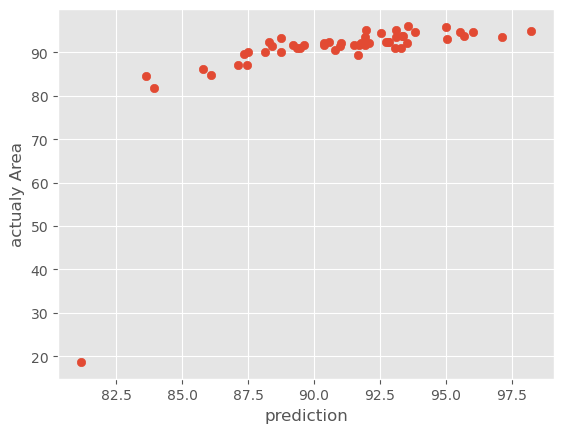

In [103]:
style.use("ggplot")

pyplot.scatter(predictions, y_test)
pyplot.xlabel("prediction")
pyplot.ylabel("actual FFMC")
pyplot.show()